In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from collections import defaultdict
from warnings import filterwarnings
import joblib as jl
import pandas as pd
import numpy as np
import cv2 as cv
import os

C:\Users\victo\AppData\Local\Temp\ipykernel_9008\3538140930.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
filterwarnings('ignore', category=UserWarning)
old_model = jl.load('./new_model.joblib')

In [3]:
src_path = './cells/'
dst_path = './numbers_for_dataset/'
dst_path2 = './test_numbers_for_dataset2/'

In [21]:
cont = defaultdict(int, {
  0: 141,
  1: 18,
  2: 18,
  3: 25,
  4: 20,
  5: 21,
  6: 24,
  7: 19,
  8: 26,
  9: 18
})

In [22]:
# repeat to increase the num of examples changing the images from cells
for _, _, files in os.walk(src_path):
  for f in files:
    img = cv.imread(src_path + f)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # img_resized = cv.resize(img, (20, 20))
    p = int(old_model.predict([img.flatten()])[0])
    cv.imwrite(dst_path + f'{p}_{cont[p]}.png', img)
    cont[p] += 1

In [23]:
cont

defaultdict(int,
            {0: 184,
             1: 23,
             2: 22,
             3: 30,
             4: 25,
             5: 25,
             6: 29,
             7: 23,
             8: 29,
             9: 21})

In [29]:
cols_names = {'label': []}
for i in range(1, 51):
  for j in range(1, 51):
    cols_names['%dx%d' % (i, j)] = []

df = pd.DataFrame(cols_names)
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,50x41,50x42,50x43,50x44,50x45,50x46,50x47,50x48,50x49,50x50


In [30]:
for _, _, files in os.walk(dst_path):
  last = -1
  total = 0
  cont = 0
  for f in files:
    label = f[0]
    if label == last and cont > 20:
      continue
    elif label != last:
      last = label
      cont = 0
      
    img = cv.imread(dst_path + f)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    row = img.flatten()
    row = np.concatenate([[label], row])
    df.loc[total] = row
    total += 1
    cont += 1

len(df)

200

In [9]:
df = pd.read_csv('new_dataset.csv')

In [9]:
# new_model = KNeighborsClassifier(n_neighbors=1)
new_model = RandomForestClassifier(n_estimators=100)
X = df.drop('label', axis=1)
y = df['label']
new_model.fit(X, y)

RandomForestClassifier()

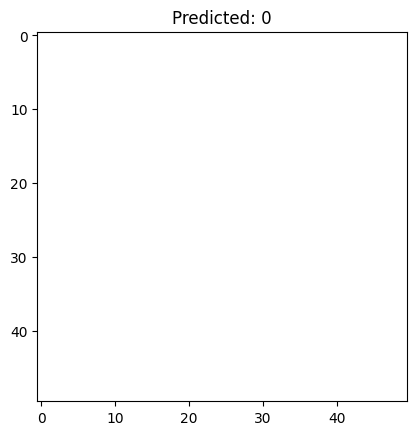

In [10]:
img = cv.imread(src_path + 'cell_0_8.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
row = img.flatten()
p = int(new_model.predict([row])[0])

plt.imshow(img, cmap=plt.cm.binary)
plt.title(f'Predicted: {p}')
plt.show()

In [ ]:
jl.dump(new_model, 'new_model.joblib')

['new_model.joblib']

In [31]:
df.to_csv('new_dataset.csv', index=None)